<a href="https://colab.research.google.com/github/ratulb/pytorch/blob/main/mnist_precursor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 21126555.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 336099.57it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6068795.23it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4678716.57it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
label_maps = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

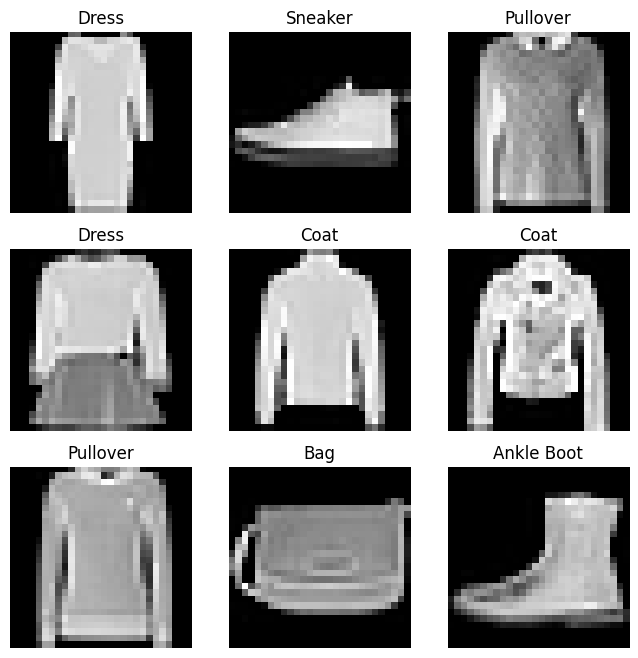

In [4]:
fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(label_maps[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [9]:
# Display image and label.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"batch size : {len(train_features)}")
print(f"Labels batch shape: {train_labels.size()}")
imgs = train_features.squeeze()
#print(f"img size: {img.size()} and img shape : {img.shape}")
#label = train_labels[0]
#plt.imshow(img, cmap="gray")
#plt.show()
print(f"Label: {label}")
print(f"imgs shape: {imgs.shape}")

Feature batch shape: torch.Size([64, 1, 28, 28])
batch size : 64
Labels batch shape: torch.Size([64])
Label: 6
imgs shape: torch.Size([64, 28, 28])


In [71]:
import os
import pandas as pd
from torchvision.io import read_image

In [101]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomMyDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        # Read CSV file and ignore lines starting with '#'
        with open(annotations_file, 'r') as f:
            lines = f.readlines()
        lines = [line for line in lines if not line.startswith('#')]

        # Write the filtered lines to a temporary file or read directly from a list of lines
        from io import StringIO
        csv_data = StringIO("\n".join(lines))
        self.img_labels = pd.read_csv(csv_data, header=None, names=['filename', 'label'])

        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        # Convert labels to integers
        self.img_labels['label'] = self.img_labels['label'].astype(int)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)

        return image, label


torch.Size([3, 525, 1081])
1


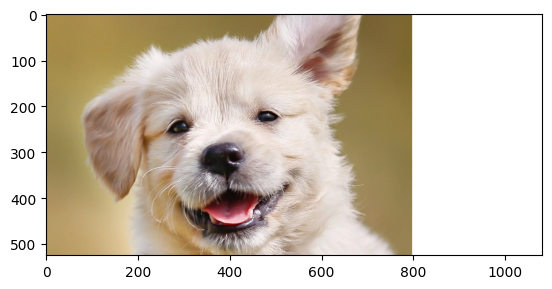

In [103]:
custom_data = CustomMyDataset(annotations_file="/content/img_dir/annotations_file.csv", img_dir="/content/img_dir")
len(custom_data)
image, label = custom_data[0]
print(image.shape)
print(label)
image = image.permute(1, 2, 0)
plt.imshow(image)
plt.show()

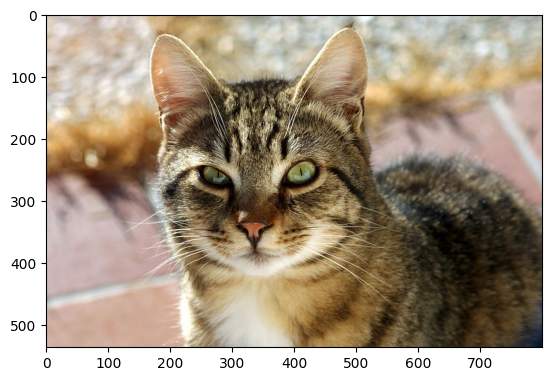

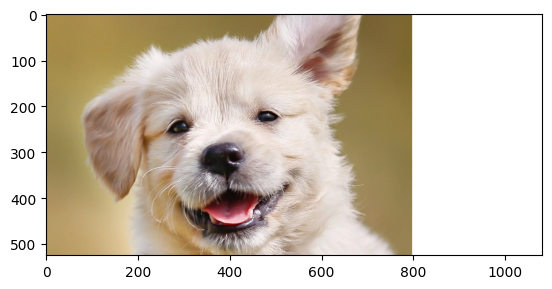

In [110]:
cust_dataloader = DataLoader(custom_data, batch_size=1, shuffle=True)
for image, label in cust_dataloader:
    image = image.squeeze().permute(1, 2, 0)
    plt.imshow(image)
    plt.show()


